# SedGen weathering

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit

import numba as nb

In [2]:
from sedgen import initialization as ini
from sedgen import weathering
from sedgen import general as gen
from sedgen import preprocessing

In [3]:
%load_ext line_profiler
%load_ext memory_profiler

In [4]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2

____

In [5]:
sedgen_CA_NS = preprocessing.load_obj("sedgen_CA_NS_init")

In [6]:
%%time 
sedgen_CA_NS_weathered = weathering.Weathering(sedgen_CA_NS, 100, enable_multi_pcg_breakage=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Wall time: 39.2 s


In [11]:
%%time
sedgen_CA_NS_weathered2 = weathering.Weathering(sedgen_CA_NS, 80, enable_multi_pcg_breakage=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
Wall time: 33.7 s


In [12]:
%%time
sedgen_CA_NS_weathered2_after = sedgen_CA_NS_weathered2.weathering(operations=['intra_cb', 'inter_cb', 'chem_mcg', 'chem_pcg'], 
                                                                 display_mass_balance=True, 
                                                                 display_mcg_sums=True,
                                                                 timesteps=None)

mcg sum over minerals after intra_cb but before inter_cb [0 0 0 0 0 0]
mcg sum after inter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 0.0
mcg_chem_residue_total: 0.0
vol_residue_total: 0.0
vol_pcg_total: 1000098378.8610438 over 2 pcg
new mass balance after step 0: 1000098378.8610438

Intra_cb 0 done in 0.0192 seconds
Inter_cb 0 done in 0.2075 seconds
Chem_mcg 0 done in 0.0139 seconds
Chem_pcg 0 done in 0.0000 seconds


Step 0 done in 0.4245 seconds
Time elapsed: 0.4244926999999734 seconds

mcg sum over minerals after intra_cb but before inter_cb [0 0 0 0 0 0]
mcg sum after inter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 1811720.1555081434
mcg_chem_residue_total: 0.0
vol_residue_total: 1811720

In [7]:
%%time
sedgen_CA_NS_weathered_after = sedgen_CA_NS_weathered.weathering(operations=['intra_cb', 'inter_cb', 'chem_mcg', 'chem_pcg'], 
                                                                 display_mass_balance=True, 
                                                                 display_mcg_sums=True,
                                                                 timesteps=None)

mcg sum over minerals after intra_cb but before inter_cb [0 0 0 0 0 0]
mcg sum after inter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 0.0
mcg_chem_residue_total: 0.0
vol_residue_total: 0.0
vol_pcg_total: 1000098378.8610438 over 2 pcg
new mass balance after step 0: 1000098378.8610438

Intra_cb 0 done in 0.0260 seconds
Inter_cb 0 done in 0.8675 seconds
Chem_mcg 0 done in 0.0161 seconds
Chem_pcg 0 done in 0.0000 seconds


Step 0 done in 1.0944 seconds
Time elapsed: 1.0943642000002 seconds

mcg sum over minerals after intra_cb but before inter_cb [0 0 0 0 0 0]
mcg sum after inter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 1811720.1555081434
mcg_chem_residue_total: 0.0
vol_residue_total: 1811720.15

____

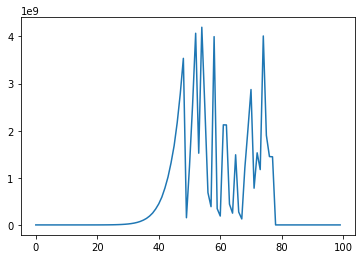

In [8]:
plt.plot(sedgen_CA_NS_weathered.mcg_broken_additions)

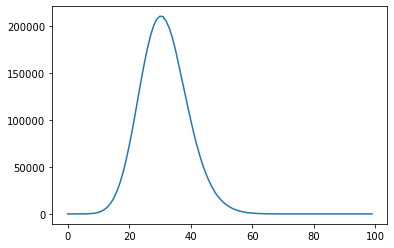

In [9]:
plt.plot(sedgen_CA_NS_weathered.pcg_additions)

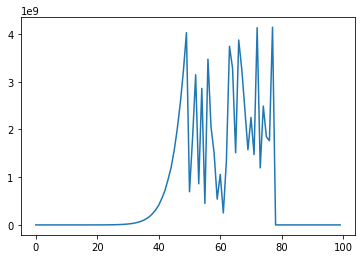

In [10]:
plt.plot(sedgen_CA_NS_weathered.mcg_additions)

In [266]:
preprocessing.save_obj(sedgen_CA_NS_weathered, "sedgen_CA_NS_weathered_73_timesteps")

In [6]:
sedgen_CA_NS_weathered_73 = preprocessing.load_obj("sedgen_CA_NS_weathered_73_timesteps")

___

In [ ]:
pcg = [np.array([0, 1, 2])]
csize = [np.array([200, 500, 400])]
prob = [np.array([0.5, 0.5])]

In [12]:
def add_prob(a):
    """Add probability for no pcg breakage to interface probability
    array based on number of crystals present in pcg."""
    a_new = np.zeros(a.size+1, dtype=a.dtype)
    a_new[:-1] = a / ((a.size + 1) / a.size)
    a_new[-1] = 1 / (a.size + 1)
    return a_new

In [14]:
add_prob(np.array([0.5, 0.25, 0.25]))

array([0.375 , 0.1875, 0.1875, 0.25  ])

In [16]:
np.array([0.5, 0.5, 0.5]) / (3 / 2)

array([0.33333333, 0.33333333, 0.33333333])

____